# Programming Exercise 1: Linear Regression¶

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
# tells matplotlib to embed plots within the notebook
%matplotlib inline

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file Data/ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

In [2]:
data = pd.read_csv('Dataset\ex1data1.txt', names = ['population','profit'])
X = data.iloc[:,0]
Y = data.iloc[:,1]
m = Y.size

Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

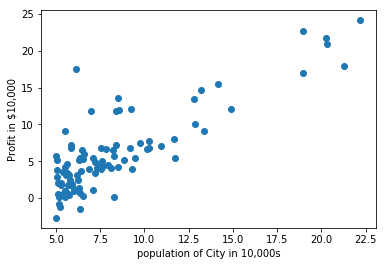

In [3]:
plt.scatter(X,Y)
plt.xlabel('population of City in 10,000s' )
plt.ylabel('Profit in $10,000')
plt.show()

Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function


In [4]:
X = np.stack([np.ones(m), X], axis = 1)


In [5]:
X.shape

(97, 2)

In [6]:
#Computing the cost using two arbitary values of theta

def computeCost(x,y, theta):
    temp = np.dot(X,theta) - Y
    j = np.sum(np.power(temp,2))/ (2*m)
    return j

j = computeCost(X,Y, theta = [0,0])
j

32.072733877455676

In [7]:
j = computeCost(X,Y, theta = [1,2])
j

75.20338497891959

Vectors and matrices in numpy - Important implementation notes
A vector in numpy is a one dimensional array, for example np.array([1, 2, 3]) is a vector. A matrix in numpy is a two dimensional array, for example np.array([[1, 2, 3], [4, 5, 6]]). However, the following is still considered a matrix np.array([[1, 2, 3]]) since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

Given the above, the function np.dot which we will use for all matrix/vector multiplication has the following properties:

It always performs inner products on vectors. If x=np.array([1, 2, 3]), then np.dot(x, x) is a scalar.
For matrix-vector multiplication, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation np.dot(y, X) considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation np.dot(X, y) considers $y$ as a $n \times 1$ vector.
A vector can be promoted to a matrix using y[None] or [y[np.newaxis]. That is, if y = np.array([1, 2, 3]) is a vector of size 3, then y[None, :] is a matrix of shape $1 \times 3$. We can use y[:, None] to obtain a shape of $3 \times 1$.

In [8]:
#Finding the optimal parameters using Gradient Descent
def gradient_descent(x, y, alpha, no_iter, theta):
    for _ in range(no_iter):
        temp = np.dot(X,theta) - Y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta    


In [9]:
alpha = 0.01
no_iter = 1500
theta = np.zeros((2,1))
Y = Y[:, np.newaxis]
theta = gradient_descent(X,Y, alpha, no_iter, theta)
theta

array([[-3.63029144],
       [ 1.16636235]])

We now have the optimized value of theta . Use this value in the above cost function.

In [10]:
j = computeCost(X,Y, theta)
j

4.483388256587726

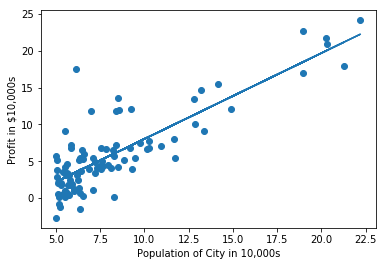

In [11]:
#Plot showing the best fit line
plt.scatter(X[:,1], Y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()


# Linear Regression with multiple variables

Problem context:
    
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.

In [12]:
data_mul = pd.read_csv('Dataset\ex1data2.txt', names = ['size(sq.ft)', 'no. of bedroom', 'price'])
X = data_mul.iloc[:,0:2]
Y = data_mul.iloc[:,2]
# feature normalization
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean)/X_std


In [13]:
# adding dimension to y
Y = Y[:, np.newaxis]

In [14]:
# Adding interecept term
m_1 = Y.size
ones = np.ones((m_1,1))
X = np.hstack((ones, X))
theta = np.zeros((3,1))
alpha = 0.01
iteration = 400

In [20]:
# computing cost
def computeCostMulti(X, Y, theta):
    temp1 = np.dot(X, theta) - Y
    return np.sum(np.power(temp1, 2)) / (2*m_1)
J = computeCostMulti(X, Y, theta)
print(J)

64297776251.62011


In [21]:
# Gradient Descent
def gradientDescentMulti(X, Y, theta, alpha, iteration):
       for _ in range(iteration):
        temp1 = np.dot(X, theta) - Y
        temp1 = np.dot(X.T, temp1)
        theta = theta - (alpha/m_1) * temp1
        return theta
theta1 = gradientDescentMulti(X, Y, theta, alpha, iteration)
print(theta1)

[[6774.21192553]
 [2101.64274191]
 [1082.78310833]]
